In [65]:
import random
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
#random number generator from set range
def roll(sides):
    num_rolled = random.randint(0, sides)
    return num_rolled

In [46]:
columns_names = ['OatSale', 'PeaSale','BeanSale','BarleySale']
index = range(1,91,1)
df = pd.DataFrame(index=index, columns = columns_names)

In [27]:
#Set Buying price
oat_buy = 1.05
pea_buy = 3.17
bean_buy = 1.99
barley_buy = 0.95

In [29]:
#Set_Selling_Price
oat_sell = 1.29
pea_sell = 3.76
bean_sell = 2.23
barley_sell = 1.65

In [34]:
#Set demands for each
oat_demand = 10
pea_demand = 8
bean_demand = 14
barley_demand = 11

In [42]:
# Demand generator for each day using random function
def generator (demand):
    veg_demand = []
    for i in range(90):
        veg_demand.append (roll(demand))
    return veg_demand

In [91]:
def SummerSeaon(n):
    result = []
    for i in range(n):
        oat = pd.Series(generator(oat_demand))
        pea = pd.Series(generator(pea_demand))
        bean = pd.Series(generator(bean_demand))
        barley = pd.Series(generator(barley_demand))
        
        df['OatSale'] = oat.values
        df['PeaSale'] = pea.values
        df['BeanSale'] = bean.values
        df['BarleySale']= barley.values
        
        df ['Oat_Cost'] = df['OatSale'].apply(lambda x: x*oat_buy)
        df ['Pea_Cost'] = df['PeaSale'].apply(lambda x: x*pea_buy)
        df ['Bean_Cost'] = df['BeanSale'].apply(lambda x: x*pea_buy)
        df ['Barley_Cost'] = df['BarleySale'].apply(lambda x: x*pea_buy)
        
        df ['Oat_Revenue'] = df['OatSale'].apply(lambda x: x*oat_sell)
        df ['Pea_Revenue'] = df['PeaSale'].apply(lambda x: x*pea_sell)
        df ['Bean_Revenue'] = df['BeanSale'].apply(lambda x: x*pea_sell)
        df ['Barley_Revenue'] = df['BarleySale'].apply(lambda x: x*pea_sell)
        
        df ['Daily_Cost'] = df['Oat_Cost'] + df['Pea_Cost'] + df['Bean_Cost'] + df['Barley_Cost']
        df ['Daily_Revenue'] = df['Oat_Revenue'] + df['Pea_Revenue'] + df['Bean_Revenue'] + df['Barley_Revenue']
        df ['Daily_Profit'] = df['Daily_Revenue'] - df['Daily_Cost']
        
        Revenue = df['Daily_Revenue'].sum()
        Cost = df['Daily_Cost'].sum()
        Profit = df['Daily_Profit'].sum()
        
        #print ('---'*28)
        #print ('Total Revenue   = %d'%Revenue, 'Total Cost = %d'%Cost, 'Total Profit   = %d' %Profit)
        # print ('---'*28)
        result.append(Profit)
    return result
        

# df.head(6)

In [95]:
answer = pd.Series(SummerSeaon(100))
answer.values
# results = (SummerSeaon(10))
# print results

array([  948.34,   924.59,   995.59,   985.2 ,   981.37,   969.87,
        1033.36,  1002.66,   924.11,   941.28,   949.38,  1001.12,
         956.79,   950.07,  1007.  ,   977.79,  1003.21,   955.81,
         992.19,   953.24,   955.14,   988.35,  1027.28,  1015.8 ,
         963.86,   970.41,  1043.49,  1024.12,   952.26,   924.08,
        1007.92,   958.31,   970.31,  1064.52,   957.76,   947.83,
         961.  ,  1009.58,   967.83,  1026.81,   974.98,  1000.79,
         964.62,  1037.38,   944.12,   958.87,   991.12,   989.42,
         965.61,   975.53,   979.73,   891.88,   974.64,  1055.36,
        1033.55,   966.55,  1021.99,   933.85,   958.6 ,   974.66,
        1018.17,   960.91,   947.39,  1010.18,   907.6 ,  1060.18,
        1001.99,  1017.21,   991.28,   992.02,   961.25,   984.02,
        1044.94,   956.79,   982.39,  1004.9 ,   975.6 ,   993.18,
        1000.76,   960.08,   954.61,  1043.53,   985.18,  1002.22,
        1015.18,  1039.01,   951.69,  1028.36,  1066.68,   974

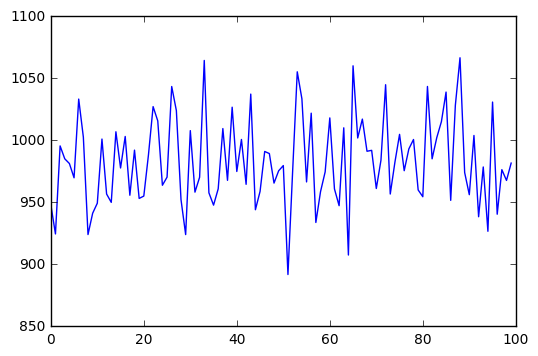

In [100]:
plt.plot(answer)
plt.show()